In [1]:
# Exploratory Data Analysis - EDA

import pandas as pd

dataset = pd.read_csv('Cleaned_Dataset.CSV')  # Getting the data from the cleaned dataset csv file

dataset.head()

,customer_id,customer_name,gender,senior_citizen,partner,dependents,tenure,contract,paperless_billing,payment_method,...,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn
0,CUST0001,John doe,male,0,yes,no,64,month to month,yes,electronic check,...,no,no,dsl,NaN,NaN,NaN,NaN,NaN,NaN,yes
1,CUST0002,Lauren Vaughan,female,1,NaN,NaN,25,month to month,yes,NaN,...,no,NaN,none,NaN,yes,NaN,NaN,NaN,NaN,NaN
2,CUST0003,Mrs. Elizabeth Turner DDS,male,1,NaN,no,61,one year,no,electronic check,...,NaN,no,none,NaN,NaN,no,NaN,NaN,no,NaN
3,CUST0004,Tiffany Johnson,female,1,NaN,yes,49,NaN,yes,NaN,...,no,no,dsl,yes,no,NaN,NaN,NaN,NaN,yes
4,CUST0005,Dr. Janice Berg,female,1,no,yes,47,NaN,no,NaN,...,no,NaN,NaN,NaN,NaN,no,yes,NaN,no,yes


In [2]:
dataset.info() # To get the non null values

dataset.isnull().sum() # To get the null value count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        1500 non-null   object 
 1   customer_name      1500 non-null   object 
 2   gender             1202 non-null   object 
 3   senior_citizen     1500 non-null   int64  
 4   partner            1208 non-null   object 
 5   dependents         771 non-null    object 
 6   tenure             1500 non-null   int64  
 7   contract           1188 non-null   object 
 8   paperless_billing  1218 non-null   object 
 9   payment_method     1191 non-null   object 
 10  monthly_charges    1500 non-null   float64
 11  total_charges      1500 non-null   float64
 12  phone_service      1007 non-null   object 
 13  multiple_lines     1127 non-null   object 
 14  internet_service   1210 non-null   object 
 15  online_security    1015 non-null   object 
 16  online_backup      1031 

customer_id            0
customer_name          0
gender               298
senior_citizen         0
partner              292
dependents           729
tenure                 0
contract             312
paperless_billing    282
payment_method       309
monthly_charges        0
total_charges          0
phone_service        493
multiple_lines       373
internet_service     290
online_security      485
online_backup        469
device_protection    511
tech_support         512
streaming_tv         738
streaming_movies     730
churn                514
dtype: int64

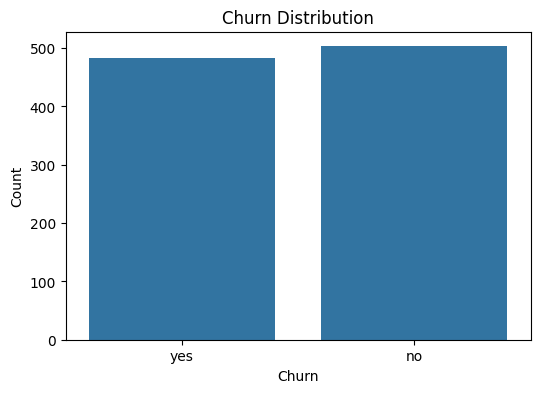

In [3]:
# Creating a chart to see the churn distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6,4)) 
sns.countplot(data=dataset, x='churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [4]:
# Making a list of column names of categorical data

category_cols = [
    'gender',
    'senior_citizen',
    'partner',
    'dependents',
    'contract',
    'paperless_billing',
    'payment_method',
    'phone_service',
    'multiple_lines',
    'internet_service',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies'
]


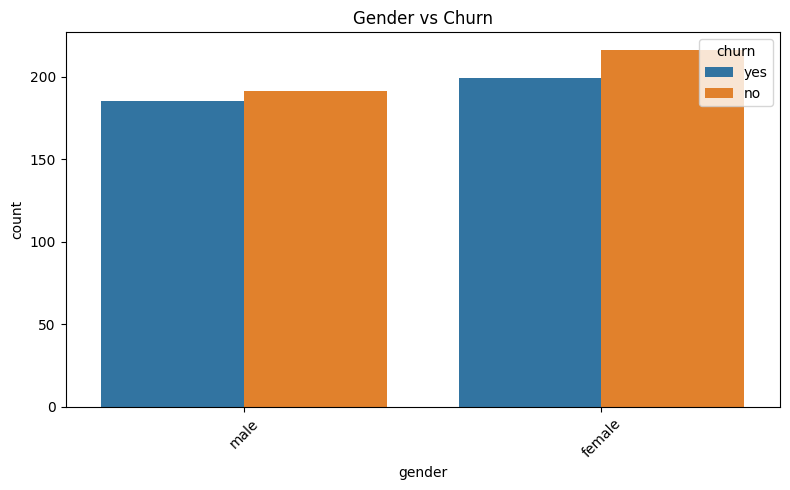

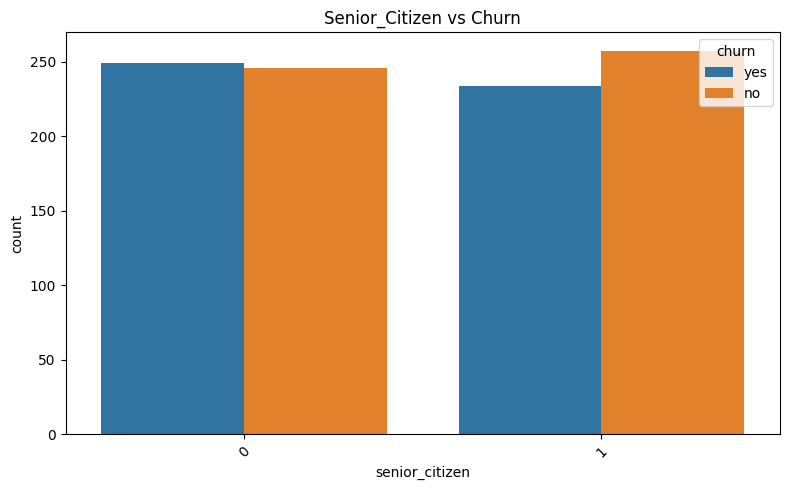

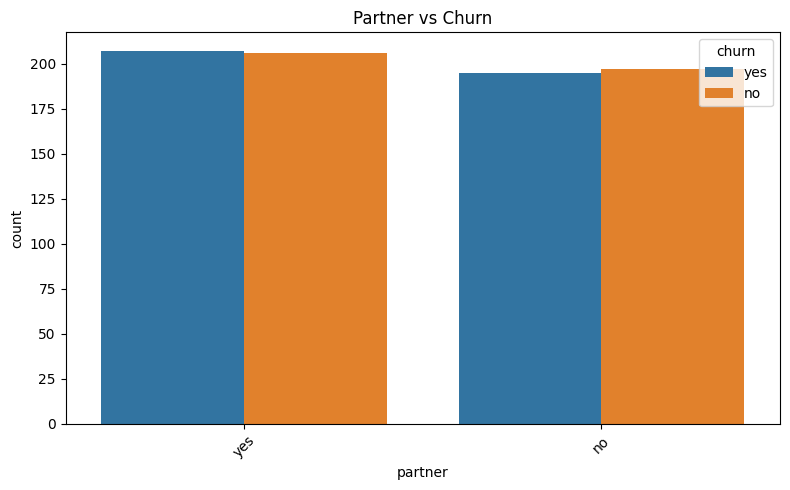

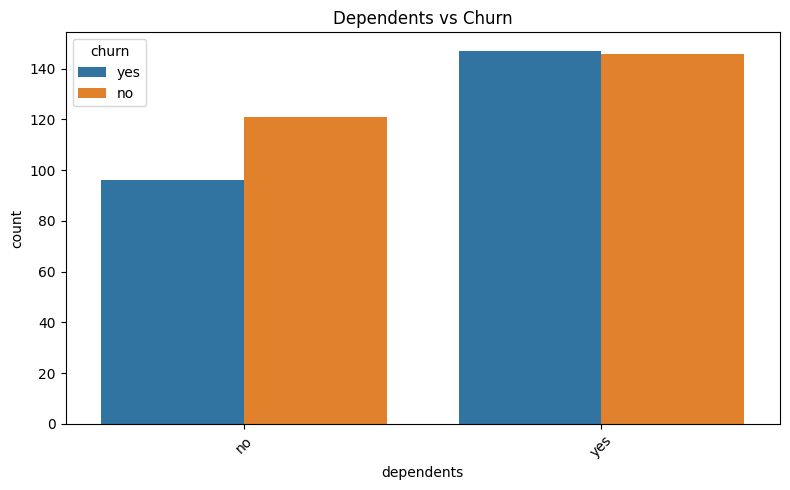

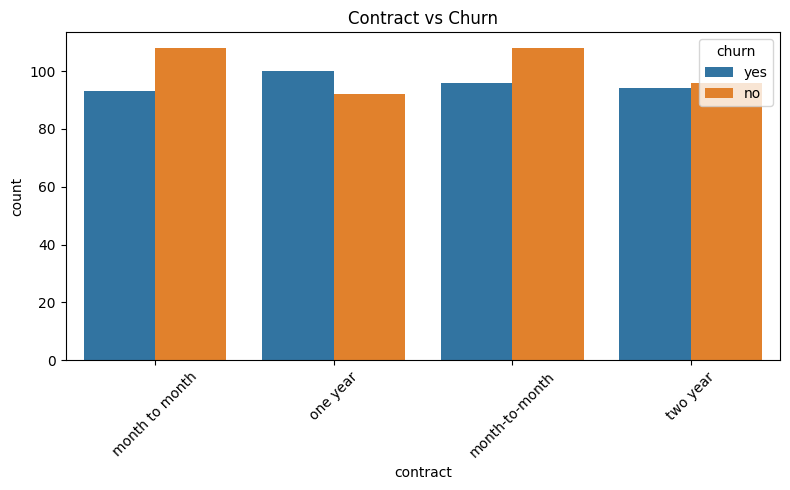

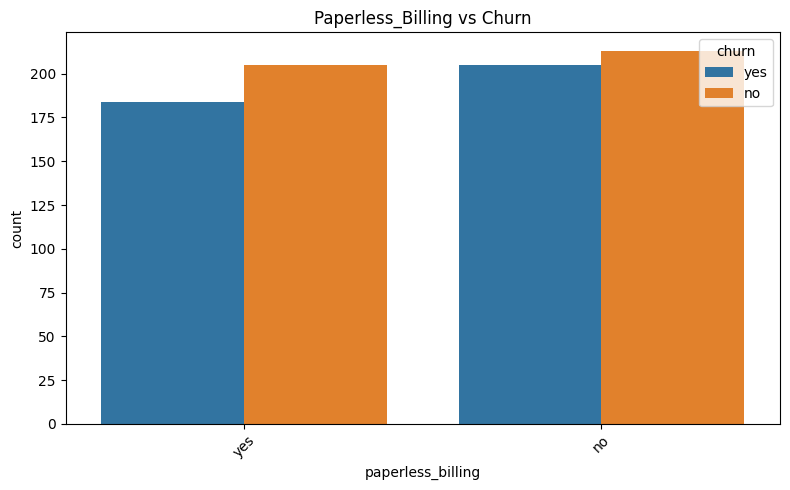

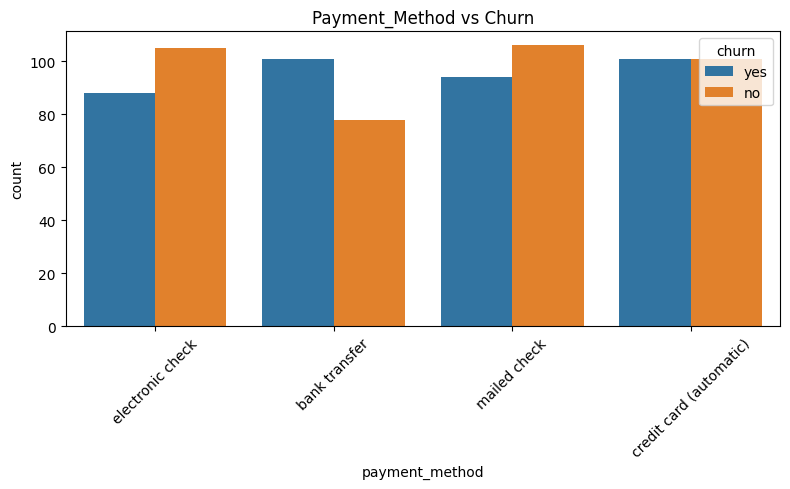

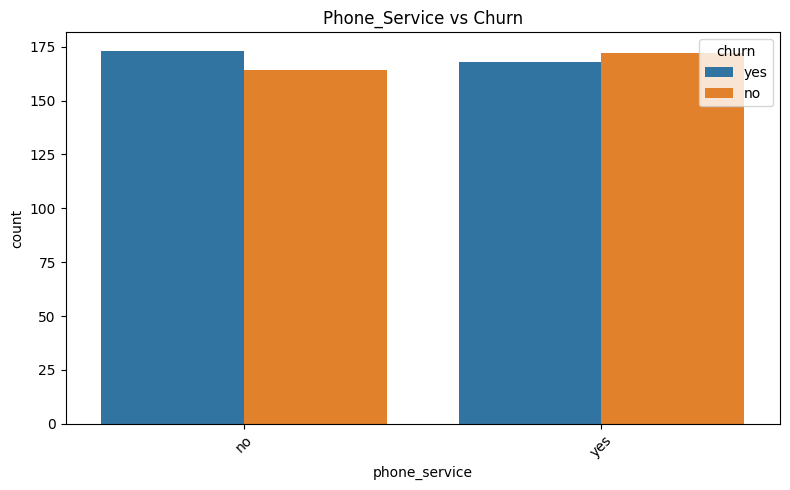

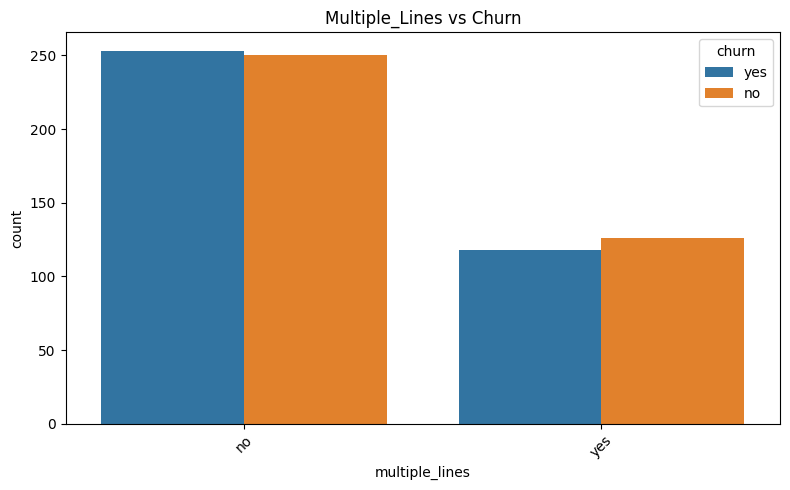

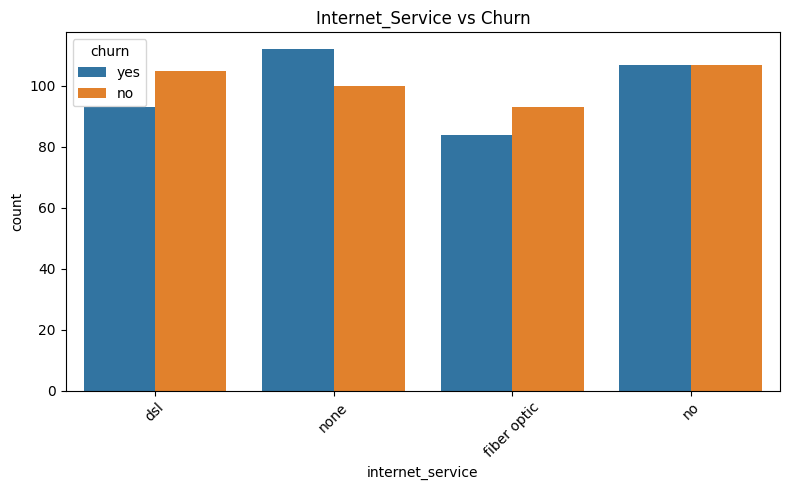

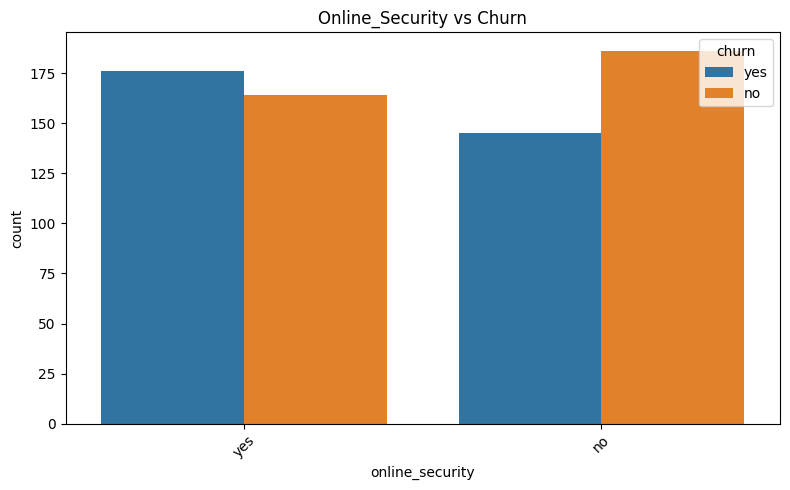

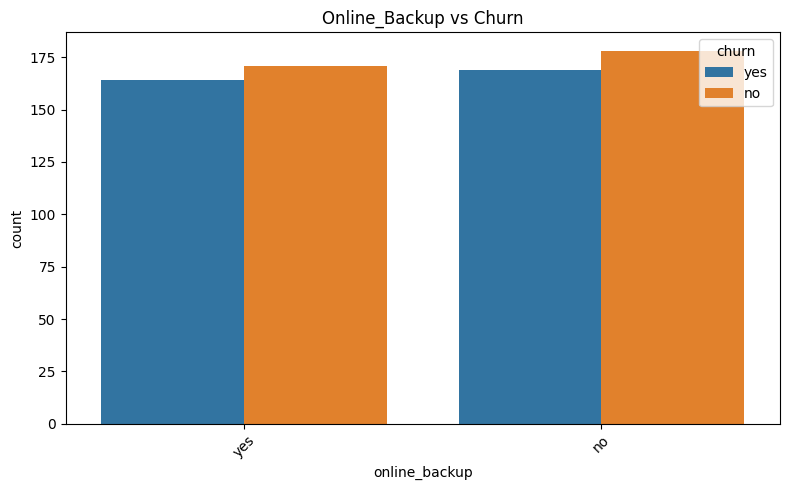

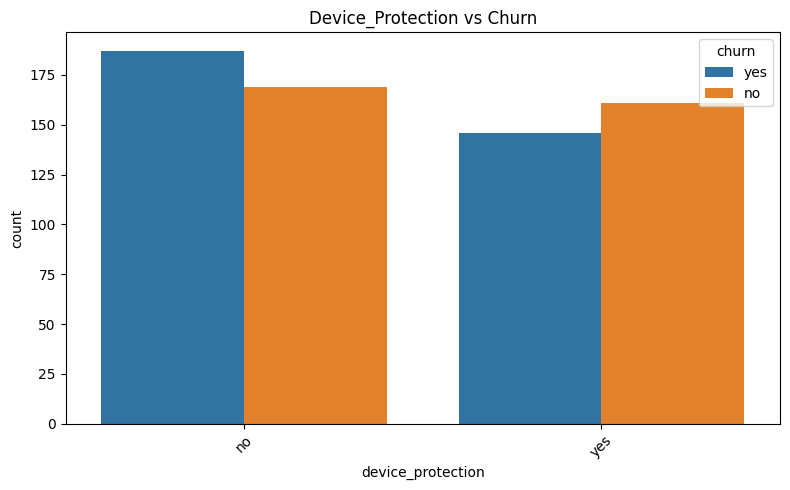

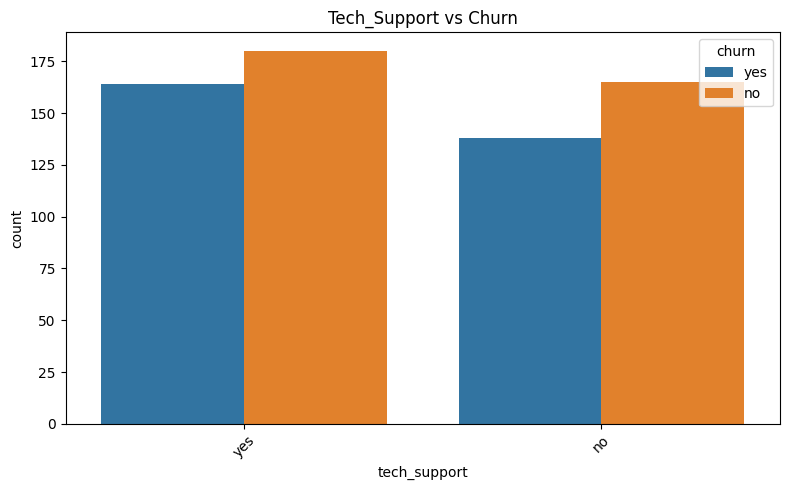

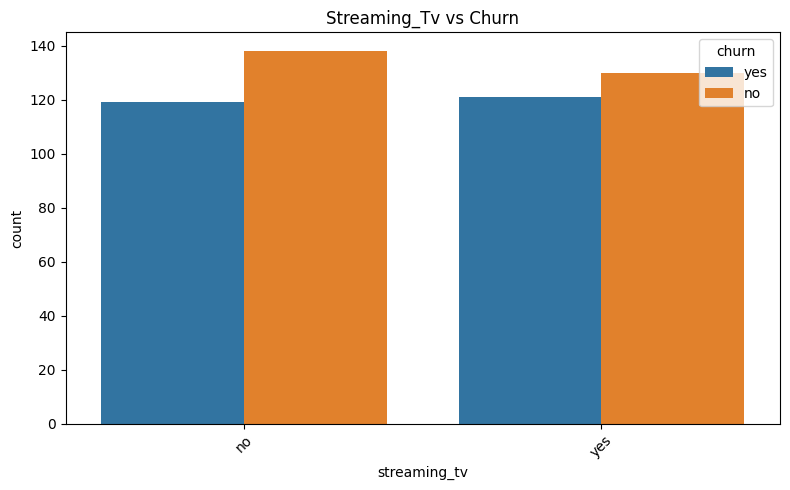

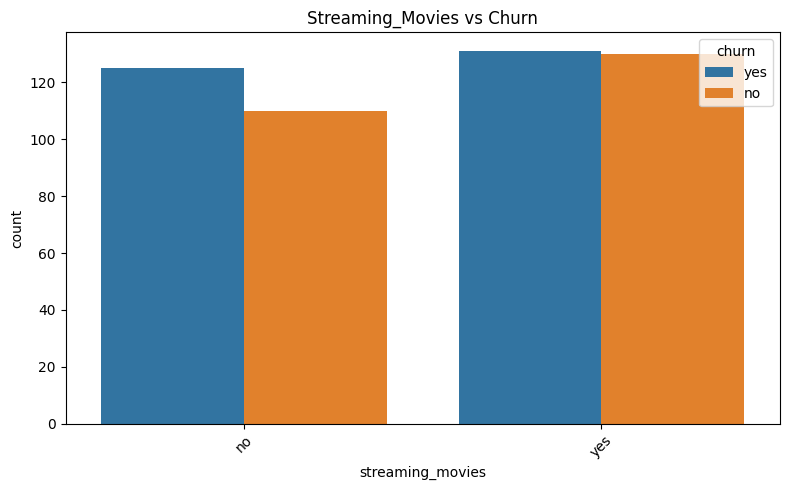

In [5]:
# Creating a for loop for getting charts for every categorical data column with respect to churn

for col in category_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=dataset, x=col, hue='churn')
    plt.title(f'{col.title()} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [6]:
# Creating a function for getting charts for every numerical data column with respect to churn

def boxplot_numeric(col):
    if col == 'tenure':
        plt.figure(figsize=(8, 5))
        sns.kdeplot(data=dataset, x='tenure', hue='churn', fill=True)
        plt.title('KDE Plot of Tenure by Churn')
        plt.show()
    elif col == 'monthly_charges':
        sns.stripplot(data=dataset, x='churn', y='monthly_charges', jitter=True, alpha=0.5)
        plt.title('Monthly Charges Spread by Churn')
        plt.show()
    elif col == 'total_charges':
        sns.histplot(data=dataset, x='total_charges', hue='churn', kde=True, bins=30)
        plt.title('Total Charges Distribution by Churn')
        plt.show()

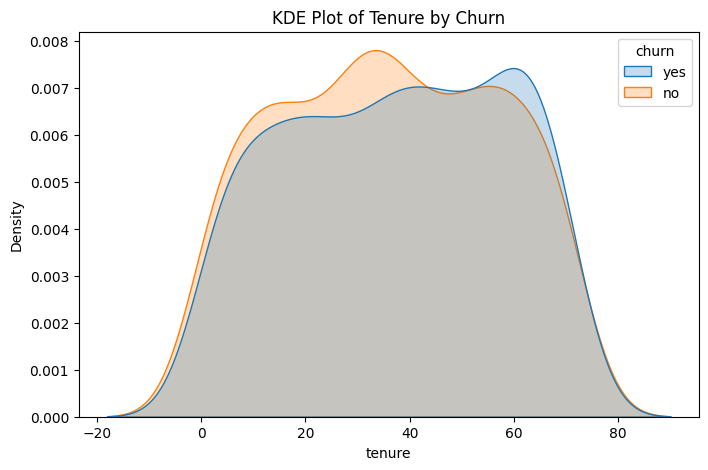

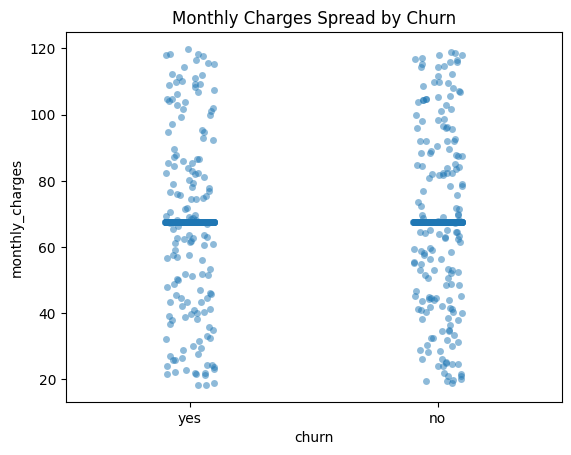

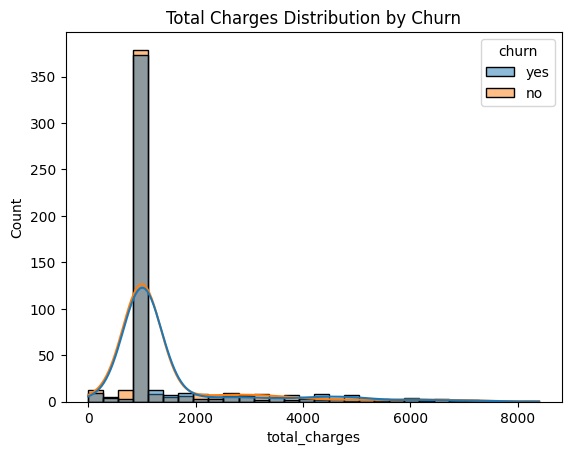

In [7]:
# Function calling for numerical data charts

boxplot_numeric('tenure')
boxplot_numeric('monthly_charges')
boxplot_numeric('total_charges')

In [8]:
# Copy dataset to avoid modifying the original
correlation_df = dataset.copy()

# Convert churn to numeric: yes = 1, no = 0 for Heatmap 
correlation_df['churn'] = correlation_df['churn'].map({'yes': 1, 'no': 0})

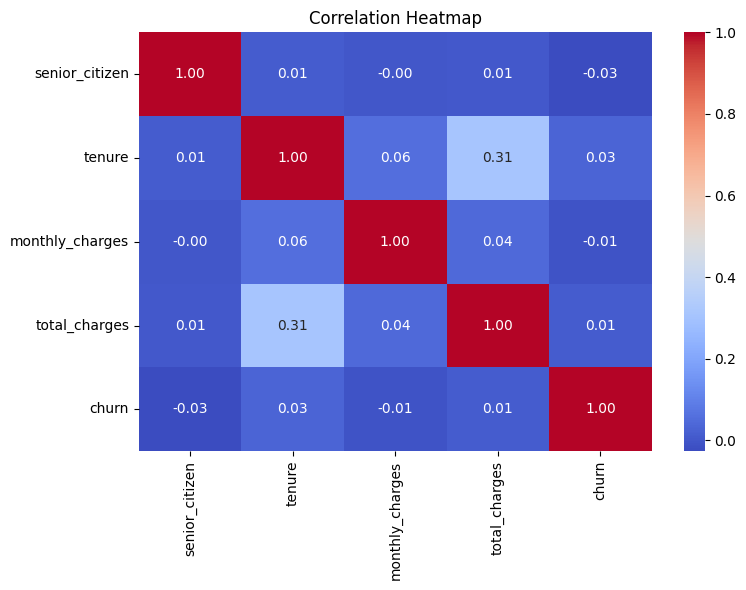

In [9]:
# Correlation Heatmap creation for the dataset of numerical columns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()